# 车牌定位测试



In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import source.ToolKit as tk
import source.PlateLocator as pl  # 导入定位模块


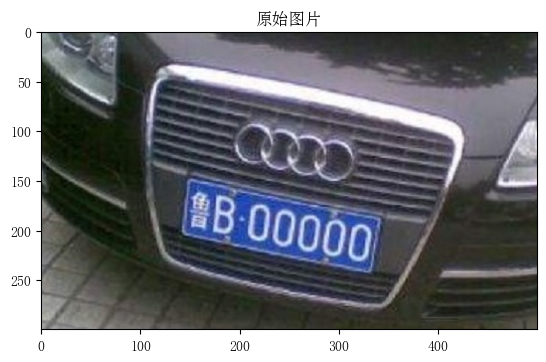

In [2]:
# 定义原始图片位置
raw_image_path = '../resources/test_plate.png'
raw_image = cv.imread(raw_image_path)

tk.show_color('原始图片',raw_image)

## 车牌定位流程

车牌定位前半段流程包括：

1. 高斯去噪
2. 灰度处理
3. 边缘检测
4. 自适应阈值处理
5. 闭运算
6. 去除白点
7. 中值滤波
8. 轮廓检测
9. 筛选车牌轮廓

上述流程结束后，将可以定位到车牌所在的具体区域。

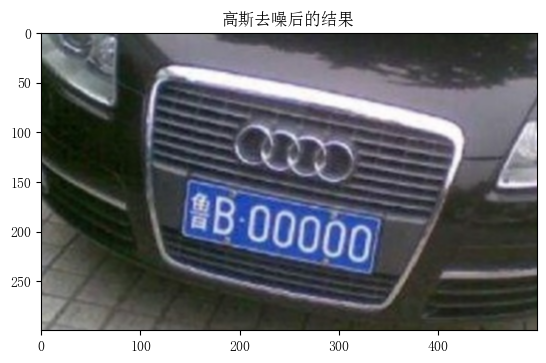

In [3]:
# 1. 高斯去噪
gauss_outcome_image = pl.gauss_process(raw_image)
# 阶段性展示
tk.show_color('高斯去噪后的结果',gauss_outcome_image)


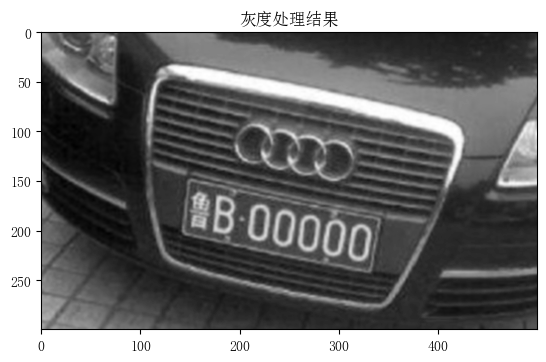

In [4]:
# 灰度处理
grayscale_outcome_image = pl.grayscale_process(gauss_outcome_image)
tk.show_gray('灰度处理结果',grayscale_outcome_image)


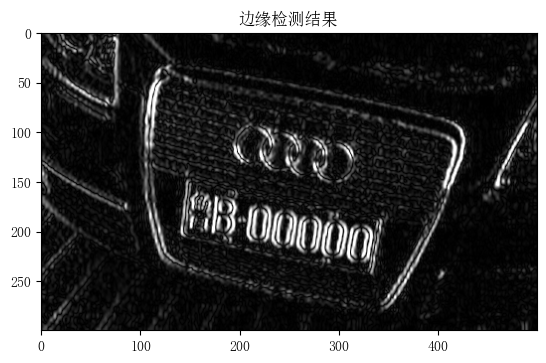

In [5]:
# 边缘检测
abs_x = pl.edge_detect(grayscale_outcome_image)
tk.show_gray('边缘检测结果',abs_x)


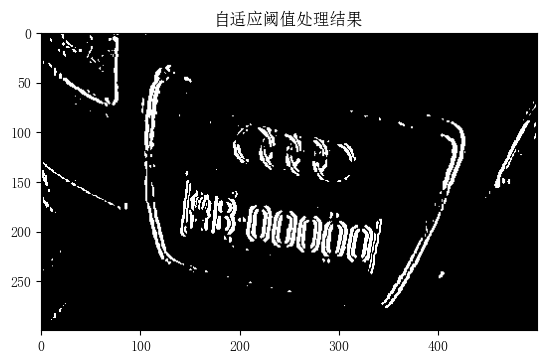

In [6]:
# 自适应阈值处理
ret, adaptive_outcome_image = pl.adaptive_threshold(abs_x)
tk.show_gray('自适应阈值处理结果',adaptive_outcome_image)


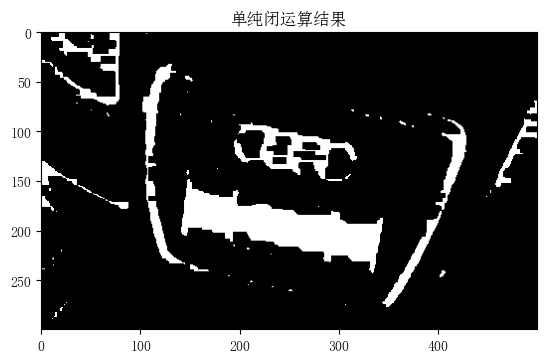

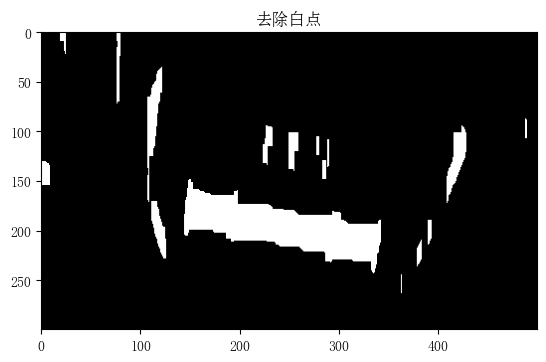

In [7]:
# 进行闭运算
kernel = cv.getStructuringElement(cv.MORPH_RECT, (14, 5))  # 创建卷积核
test_closed_operation_outcome = cv.morphologyEx(adaptive_outcome_image, cv.MORPH_CLOSE, kernel, iterations=1)  # 进行闭运算

tk.show_gray('单纯闭运算结果',test_closed_operation_outcome)

# 去除白点
kernel_x = cv.getStructuringElement(cv.MORPH_RECT, (20, 1))
kernel_y = cv.getStructuringElement(cv.MORPH_RECT, (1, 19))
# 膨胀、腐蚀
image = cv.dilate(test_closed_operation_outcome, kernel_x)  # 膨胀
image = cv.erode(image, kernel_x)  # 腐蚀
# 腐蚀、膨胀
image = cv.erode(image, kernel_y)
image = cv.dilate(image, kernel_y)
# 展示性输出
tk.show_gray('去除白点', image)




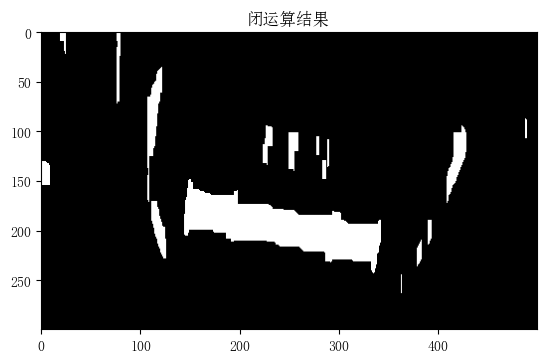

In [8]:
# 闭运算
closed_image = pl.closed_operation(adaptive_outcome_image)
tk.show_gray('闭运算结果',closed_image)


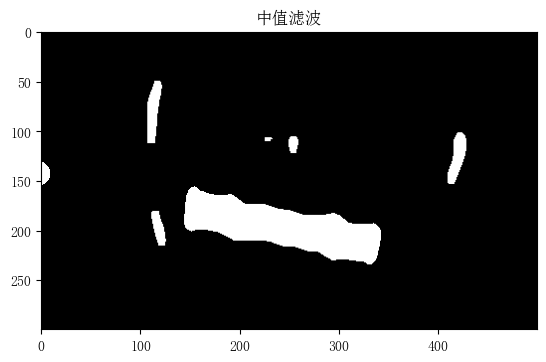

In [9]:
# 中值滤波
median_outcome_image = pl.median_filter(closed_image)
tk.show_gray('中值滤波',median_outcome_image)


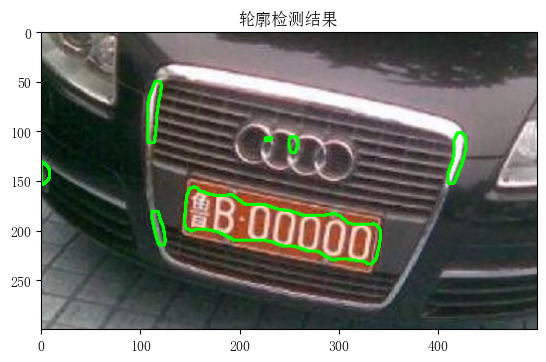

In [10]:
# 轮廓检测
contours, image_with_contours = pl.detect_contours(median_outcome_image, raw_image)
tk.show_gray('轮廓检测结果',image_with_contours)



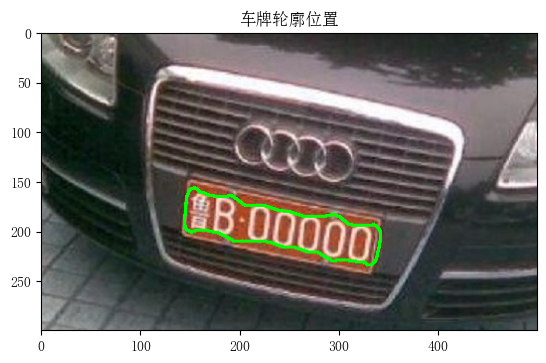

In [11]:
# 筛选车牌轮廓
image_with_plate_found = pl.find_plate_contour(contours, raw_image)
tk.show_gray('车牌轮廓位置',image_with_plate_found)
